<a href="https://colab.research.google.com/github/gaberm/ML-Journey/blob/master/Exercises/Iris_Datasetipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Dataset 

## Steps:
1. Check for correlation and covariance as well.
2. Create a scatter plot if both are numeric else boxplot if x is categorical and y is numerical.
3. If the scatterplot shows some pattern like linearity, apply regression and check the assumptions of regression. Perform rainbow test to check linearity, Shapiro wilk test to check normality, breusch pagan to check heteroscedasticity, VIF for Multicollinearity and Durbin Watson for Auto Correlation in errors. 
4. If the pattern is not clear, apply decision tree and find out the rules created by that model. 

This is just an outline and Hope this will get you started in exploring the variables.

In [0]:
# EnvSet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [224]:
## Getting the data
from sklearn.datasets import fetch_openml

iris = fetch_openml('iris', version=1) 
print(dir(iris))

['DESCR', 'categories', 'data', 'details', 'feature_names', 'frame', 'target', 'target_names', 'url']


 ## Eploratory Data Analysis
 
 1. Understand the Data
 

In [225]:
# Dataframes
features = pd.DataFrame(iris.data, columns=iris.feature_names)
label = pd.DataFrame(iris.target, columns=iris.target_names)

dataset = pd.DataFrame({'sepallength': iris.data[:,0], 'sepalwidth':iris.data[:,1],  'petallength':iris.data[:,2],  'petalwidth':iris.data[:,3], 'class':iris.target} )

# dataset = pd.DataFrame ( data=(iris.data[:,0], iris.data[:,1], iris.data[:,2], iris.data[:,3], iris.target), index = ['sepallength', 'sepalwidth', 'petallength',  'petalwidth', 'class']).T

print( features.head(3),
      label.head(3),
      dataset.head(3),
      sep='\n')

   sepallength  sepalwidth  petallength  petalwidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0.2
2          4.7         3.2          1.3         0.2
         class
0  Iris-setosa
1  Iris-setosa
2  Iris-setosa
   sepallength  sepalwidth  petallength  petalwidth        class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa


In [226]:
## Statistical Summary
print( 'Statistical Summary',dataset.describe(), sep='\n' )

## class distrubition 
print( 'Class distrubition', dataset.groupby('class').size(), sep='\n')

Statistical Summary
       sepallength  sepalwidth  petallength  petalwidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000
Class distrubition
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


2. Look for relations, Visualize

 Data = [Features , Label ]We are going to look at two types of plots:
  *   Univariate plots to better understand each attribute.
  *   Multivariate plots to better understand the relationships between attributes. 

In [0]:
# Univariate - Box plots
# dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(12,10))
# plt.show()

In [228]:
# ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']

figure = plt.figure(figsize=(8,6))
figure.add_subplot(2, 2, 1)
# plt.imshow(image_grey, cmap='gray'), plt.axis("off")
sns.boxplot(data= dataset.sepallength)
plt.title('Sepal Length')

figure.add_subplot(2, 2, 2)
# plt.imshow(image_binarized, cmap='gray'), plt.axis("off")
sns.boxplot(data= dataset.sepalwidth)
plt.title('Sepalwidth')

figure.add_subplot(2, 2, 3)
# plt.imshow(image_binarized, cmap='gray'), plt.axis("off")
sns.boxplot(data= dataset.petallength)
plt.title('Petallength')

figure.add_subplot(2, 2, 4)
# plt.imshow(image_binarized, cmap='gray'), plt.axis("off")
sns.boxplot(data= dataset.petalwidth)
plt.title('Petalwidth')

plt.show()

In [229]:
# Univariate - histogram
# figure = plt.figure(figsize=(8,6))
dataset.plot(kind='hist', subplots=True, layout=(2,2),figsize = (8,6))
plt.show()

In [230]:
# Multivariate Plots
sns.pairplot(dataset)
plt.show()

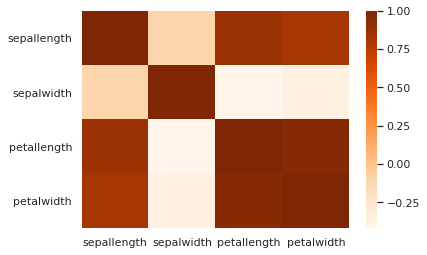

In [231]:
## Correlation coefficients 
sns.heatmap(dataset.corr(), cmap='Oranges')

## Modeling

Here is what we are going to cover in this step:

* Separate out a validation dataset.
* Set-up the test harness to use 10-fold cross validation.
* Build 5 different models to predict species from flower measurements
* Select the best model. 

## Scaling the Data #TODO

If you look at the dataset you'll notice that it is not scaled well. For instance the "volatile acidity" and "citric acid" column have values between 0 and 1, while most of the rest of the columns have higher values. Therefore, before training the algorithm, we will need to scale our data down.

example ```StandardScalar`` class.

## 1. Train, Test Split

In [0]:
# Train, test, split
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

## 2. Test Harness

We are using the metric of ‘accuracy‘ to evaluate models. This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

## 3.Build Models

In [0]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [234]:
## Testing harness
seed = 7
scoring = 'accuracy'

## evaluate each model in turn
names, results = [], []
for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        names.append(name)
        results.append(cv_results)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

# for i in range(len(results)):
#   print(*results[i])
# pd.DataFrame(results)

LR: 0.950000 (0.066667)
LDA: 0.966667 (0.055277)
CART: 0.916667 (0.117851)
KNN: 0.941667 (0.065085)
NB: 0.941667 (0.075000)
SVM: 0.958333 (0.055902)


We can see that LDA has the best score, followed by LR & SVM
Plotting Model evaluation results and comparing the spread and the mean accuracy of each model.

### 3.1 K-Neighbors

In [235]:
# Compare Algos
fig = plt.figure()
fig.suptitle('Algorthm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 3.1.1.Make Predictions

The KNN algorithm was the most accurate model that we tested. Now we want to get an idea of the accuracy of the model on our validation set.

This will give us an independent final check on the accuracy of the best model. It is valuable to keep a validation set just in case you made a slip during training, such as overfitting to the training set or a data leak. Both will result in an overly optimistic result.

We can run the KNN model directly on the validation set and summarize the results as a final accuracy score, a confusion matrix and a classification report.

In [236]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(accuracy_score(y_test, predictions))
print("\t=============================================\n")
sns.heatmap(confusion_matrix(y_test, predictions), cmap = 'Purples', )
print("\t=============================================\n")
print(classification_report(y_test, predictions))

0.9666666666666667


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



We can see that the accuracy is 0.95 or 95%. The confusion matrix provides an indication of the three errors made. Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (granted the validation dataset was small).

### 3.1.2 Performing a Grid Search

To Investigate
## Getting the keys
```
clf.get_params().keys()

>> dict_keys(['cv', 'error_score', 'estimator__algorithm', 'estimator__leaf_size', 'estimator__metric', 
  'estimator__metric_params', 'estimator__n_jobs', 'estimator__n_neighbors', 'estimator__p', 'estimator__weights', 
  'estimator', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])
```

In [237]:
from sklearn.model_selection import GridSearchCV

## Model
knn = KNeighborsClassifier()

## GridSearch
params = {
        'n_neighbors': [3, 5, 7, 9, 11], # usually odd numbers
        'weights' : ['uniform', 'distance'],
        'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
        'leaf_size' : [20, 30, 40],
        'p' : [1, 2], 
        'n_jobs' : [None, -1]
    }
grid_sr = GridSearchCV(knn, param_grid=params, cv=5)
grid_sr.fit(X_train,y_train)

best_params = grid_sr.best_params_
# clf.score(X_test,y_test)
print(best_params)

{'algorithm': 'brute', 'leaf_size': 20, 'n_jobs': None, 'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}


In [238]:
print ("#")
print ("# Best score:", grid_sr.best_score_)
best_parameters = grid_sr.best_estimator_.get_params()
for param_name in sorted(best_params.keys()):
    print ("#  {0}: {1}".format(param_name, best_parameters[param_name]))
print( "#")

print( grid_sr.best_estimator_ )

#
# Best score: 0.9666666666666668
#  algorithm: brute
#  leaf_size: 20
#  n_jobs: None
#  n_neighbors: 11
#  p: 2
#  weights: uniform
#
KNeighborsClassifier(algorithm='brute', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')


### 3.1.3 Making Predictions with GridSearch Params

1.0


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



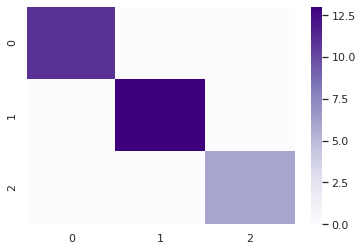

In [239]:
knn_gsr = grid_sr.best_estimator_
knn_gsr.fit(X_train, y_train)
pred_gsr = knn_gsr.predict(X_test)

print(accuracy_score(y_test, pred_gsr))
print("\t=============================================\n")
sns.heatmap(confusion_matrix(y_test, pred_gsr), cmap = 'Purples', )
print("\t=============================================\n")
print(classification_report(y_test, pred_gsr))

### 3.2. Support Vector Machines

1.0


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



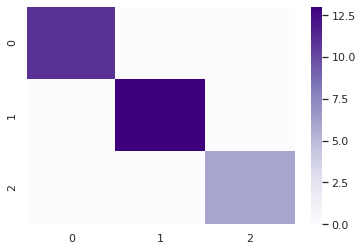

In [240]:
svc = SVC()
svc.fit(X= X_train,y= y_train)
predictions = svc.predict(X_test)
print(accuracy_score(y_test, predictions))
print("\t=============================================\n")
sns.heatmap(confusion_matrix(y_test, predictions), cmap = 'Purples', )
print("\t=============================================\n")
print(classification_report(y_test, predictions))

### 3.3. LogisticRegression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


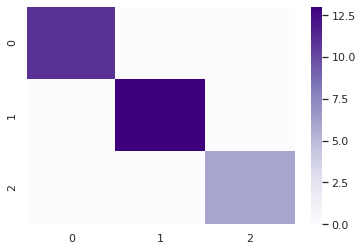

In [241]:
logrg = LogisticRegression()
logrg.fit(X_train, y_train)
y_predict = logrg.predict(X_test)
# print(y_predict)

sns.heatmap(confusion_matrix(y_test, predictions), cmap = 'Purples', )
print(confusion_matrix(y_test, y_predict))

# ConvergenceWarning: lbfgs failed to converge (status=1):
# STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

### 3.3.1 GridSearching LogisticRegression

In [242]:
## Model
lr = LogisticRegression()

## GridSearch
params = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [0.01, .1, .5, 1.0],
    'solver' : ['newton-cg', 'lbfgs', 'sag', 'saga'], 
    'max_iter' : [ 100, 300, 500, 1000, 1200, 1500]
    }
grid_sr = GridSearchCV(lr, param_grid=params, cv=5)
grid_sr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 0.5, 1.0],
                         'max_iter': [100, 300, 500, 1000, 1200, 1500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
    

{'C': 0.01, 'max_iter': 100, 'penalty': 'none', 'solver': 'newton-cg'}
1.0


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


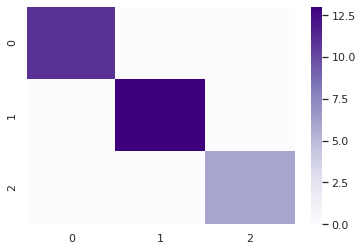

In [243]:
best_params = grid_sr.best_params_
# clf.score(X_test,y_test)
print(best_params)

lr_gsr = grid_sr.best_estimator_
lr_gsr.fit(X_train, y_train)
lr_gsr = lr_gsr.predict(X_test)

print(accuracy_score(y_test, lr_gsr))
print("\t=============================================\n")
sns.heatmap(confusion_matrix(y_test, lr_gsr), cmap = 'Purples', )
print("\t=============================================\n")
print(classification_report(y_test, lr_gsr))

{'C': 0.01, 'max_iter': 100, 'penalty': 'none', 'solver': 'newton-cg'}
1.0


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


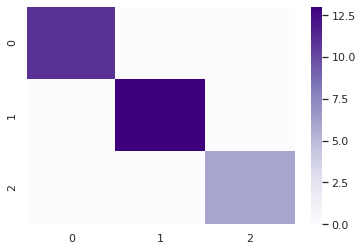

In [244]:
best_params = grid_sr.best_params_
# clf.score(X_test,y_test)
print(best_params)
# x= best_params
# best_params['penalty']='l2'


lr_gsr = grid_sr.best_estimator_
# lr_gsr = LogisticRegression(best_params)
lr_gsr.fit(X_train, y_train)
lr_gsr = lr_gsr.predict(X_test)

print(accuracy_score(y_test, lr_gsr))
print("\t=============================================\n")
sns.heatmap(confusion_matrix(y_test, lr_gsr), cmap = 'Purples', )
print("\t=============================================\n")
print(classification_report(y_test, lr_gsr))

In [0]:
## Changin keys in dict.
# x= best_params
# best_params['penalty']='l2'


# lr_gsr = grid_sr.best_estimator_
# lr_gsr = LogisticRegression(best_params)

In [246]:
x= best_params
x['penalty']='l2'
x

{'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

## Experminting with matplotlib

```plt.subplots()``` is a function that returns a tuple containing a figure and axes object(s). Thus when using ```fig, ax = plt.subplots()``` you unpack this tuple into the variables fig and ax. 

Having fig is useful if you want to change figure-level attributes or save the figure as an image file later (e.g. with fig.savefig('yourfilename.png')). 

You certainly don't have to use the returned figure object but many people do use it later so it's common to see. Also, all axes objects (the objects that have plotting methods), have a parent figure object anyway, thus:
```
fig, ax = plt.subplots()
```
is more concise than this:
```
fig = plt.figure()
ax = fig.add_subplot(111)
```

There is also an important difference between plt.subplots() and ```plt.subplot()```, notice the missing 's' at the end.

One can use ```plt.subplots()``` to make all their subplots at once and it returns the figure and axes (plural of axis) of the subplots as a tuple. A figure can be understood as a canvas where you paint your sketch.
```
# create a subplot with 2 rows and 1 columns
fig, ax = plt.subplots(2,1)
```
Whereas, you can use ```plt.subplot()``` if you want to add the subplots separately. It returns only the axis of one subplot.
```
fig = plt.figure() # create the canvas for plotting
ax1 = plt.subplot(2,1,1) 
# (2,1,1) indicates total number of rows, columns, and figure number respectively
ax2 = plt.subplot(2,1,2)
```

However, ```plt.subplots()``` is preferred because it gives you easier options to directly customize your whole figure
```
# for example, sharing x-axis, y-axis for all subplots can be specified at once
fig, ax = plt.subplots(2,2, sharex=True, sharey=True)

```

Text(0.5, 1.0, 'Simple plot')

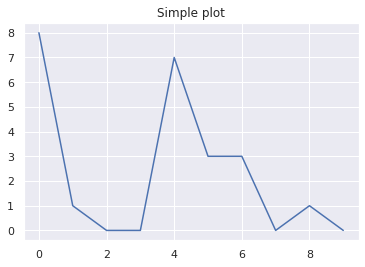

In [257]:
X = np.arange(0, 10)
y1 = np.random.randint(0, 10, 10)
y2 = np.sin(X**2)

# print(X, y)

fig, ax = plt.subplots()
ax.plot(X, y1)
ax.set_title('Simple plot')

Text(0.5, 1.0, 'Simple plot 2')

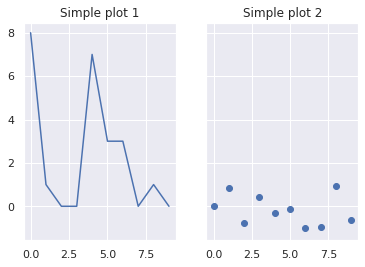

In [281]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True, squeeze=False, subplot_kw=None, gridspec_kw=None,)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

# Plotting Axes1
ax[0,0].plot(X, y1)
ax[0,0].set_title('Simple plot 1')

# Plotting Axes2
ax[0,1].scatter(X, y2)
ax[0,1].set_title('Simple plot 2')

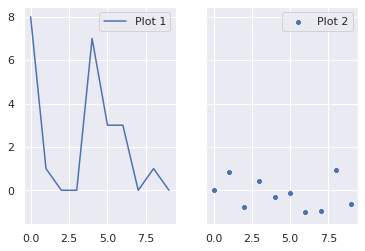

In [305]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey='row', squeeze=False)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

# Plotting Axes1
sns.lineplot( X, y1, ax = ax[0,0], **{'label': 'Plot 1'})

# Plotting Axes2
sns.scatterplot( X, y2, ax = ax[0,1], **{'label': 'Plot 2', 'marker': 'o'})